__Importing Libraries__

pandas is used for data analysis
NumPy is used for numerical computing

In [1]:
import pandas as pd
import numpy as np
import matplotlib

__Importing DataSet__

In [2]:
train_df = pd.read_csv(r'C:\Users\Sunidhar\kaggle\house-prices-advanced-regression-techniques\train.csv')

checking wether the data set imported sucessfully using head() function which gives first 5 rows of dataset.

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   MSZoning            1460 non-null   object 
 3   LotFrontage         1201 non-null   float64
 4   LotArea             1460 non-null   int64  
 5   Street              1460 non-null   object 
 6   Alley               91 non-null     object 
 7   LotShape            1460 non-null   object 
 8   LandContour         1460 non-null   object 
 9   Utilities           1460 non-null   object 
 10  LotConfig           1460 non-null   object 
 11  LandSlope           1460 non-null   object 
 12  Neighborhood        1460 non-null   object 
 13  Condition1          1460 non-null   object 
 14  Condition2          1460 non-null   object 
 15  BldgType            1460 non-null   object 
 16  HouseS

**Feature Engineering**

Features of Interest

*GrLivArea: Above grade (ground) living area square feet*

*TotalBsmtSF: Total square feet of basement area*

*Bedroom: Number of bedrooms above basement level*

*BsmtFullBath: Basement full bathrooms*

*BsmtHalfBath: Basement half bathrooms*

*FullBath: Full bathrooms above grade*de

*HalfBath: Half baths above grade*

In [5]:
# Calculate total square footage
train_df['TotalSquareFootage'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
# Calculate total number of bathrooms
train_df['TotalFullBath'] = train_df['FullBath'] + train_df['BsmtFullBath']
train_df['TotalHalfBath'] = train_df['HalfBath'] + train_df['BsmtHalfBath']
train_df['TotalBathrooms'] = train_df['TotalFullBath'] + (0.5 * train_df['TotalHalfBath'])

**Filtering the Data**

In [6]:
intrested_columns = ['TotalSquareFootage','BedroomAbvGr', 'TotalBathrooms','SalePrice']
df_filtered = train_df[intrested_columns]
df_filtered.head()

,TotalSquareFootage,BedroomAbvGr,TotalBathrooms,SalePrice
0,2566,3,3.5,208500
1,2524,3,2.5,181500
2,2706,3,3.5,223500
3,2473,3,2.0,140000
4,3343,4,3.5,250000


__Define x and y__

*x is for features, y is for target*

In [7]:
x = df_filtered.drop(['SalePrice'],axis=1).values
y = df_filtered['SalePrice'].values
print(x[0:10])

[[2.566e+03 3.000e+00 3.500e+00]
 [2.524e+03 3.000e+00 2.500e+00]
 [2.706e+03 3.000e+00 3.500e+00]
 [2.473e+03 3.000e+00 2.000e+00]
 [3.343e+03 4.000e+00 3.500e+00]
 [2.158e+03 1.000e+00 2.500e+00]
 [3.380e+03 3.000e+00 3.000e+00]
 [3.197e+03 3.000e+00 3.500e+00]
 [2.726e+03 2.000e+00 2.000e+00]
 [2.068e+03 2.000e+00 2.000e+00]]


In [8]:
print(y[0:10])

[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000]


**Spliting Data Set**

*using scikit learn lib to split the data*

In [9]:
from sklearn.model_selection import train_test_split

*splitting data intpo train and test in a ratio of 70 : 30*

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

**Train the Model**

*import linear regression model from scikit learn*

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

**Predict the test set results**

In [13]:
y_pred = ml.predict(x_test)
print(y_pred[0:10])

[350565.03823889 159860.75217503 125672.31977679 215274.74473414
  92237.28751274 149688.39035649 224919.98871594 131206.30579718
 530822.00370469 133434.30265191]


In [14]:
ml.predict([[2.566e+03 ,3.000e+00, 3.500e+00]])

array([209245.36596726])

**Evaluate the Model**

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5524582247721037

**Plot the Results**

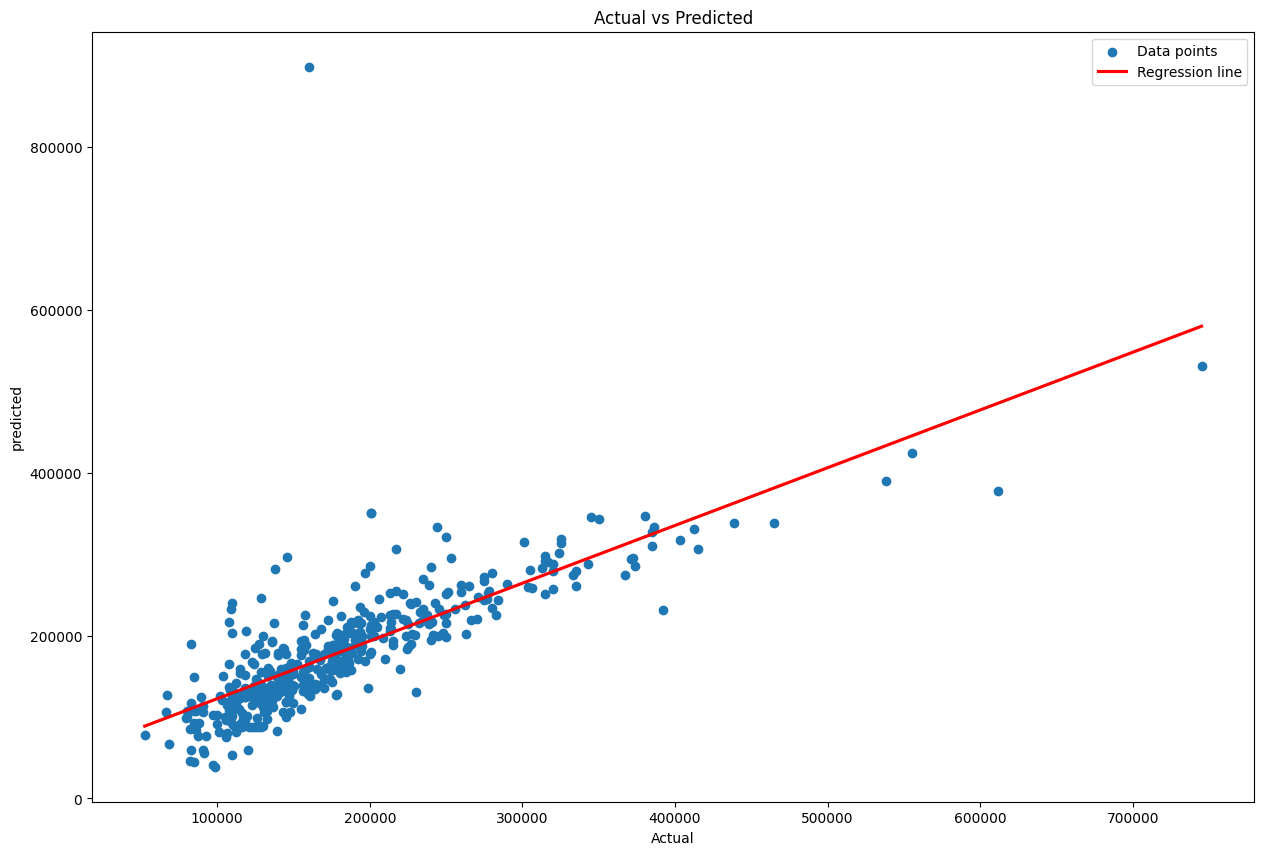

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred, label='Data points')
sns.regplot(x=y_test, y=y_pred, ci=None, scatter=False, line_kws={"color": "red"}, label='Regression line')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


**Predicted Values**

In [17]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,200624,350565.038239,-149941.038239
1,133000,159860.752175,-26860.752175
2,110000,125672.319777,-15672.319777
3,192000,215274.744734,-23274.744734
4,88000,92237.287513,-4237.287513
5,85000,149688.390356,-64688.390356
6,282922,224919.988716,58002.011284
7,141000,131206.305797,9793.694203
8,745000,530822.003705,214177.996295
9,148800,133434.302652,15365.697348
